In [21]:
#all imports for project 
from pathlib import Path 
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# our own acquire script:
#import acquire 

#import prep

#alpha will equal .05 for all statistical tests
a = .05

np.random.seed(100)


In [2]:
# reading data into python from excel 
df = pd.read_excel('Adidas_US_Sales_Datasets.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [4]:
# dropping column "Unnamed"
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# lowercase and replace spaces with underscore
df.columns = [column.replace('+','_').lower() for column in df]
#replace spaces with underscore
df.columns = [column.replace(' ','_').lower() for column in df]

In [6]:
# checking for nulls, removal of unnamed column and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   retailer_id       9648 non-null   int64         
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price_per_unit    9648 non-null   float64       
 8   units_sold        9648 non-null   int64         
 9   total_sales       9648 non-null   float64       
 10  operating_profit  9648 non-null   float64       
 11  operating_margin  9648 non-null   float64       
 12  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [7]:
# dropping additional columns
df = df.drop(columns=['invoice_date','operating_profit','price_per_unit','units_sold','retailer_id','total_sales'])

In [8]:
df.describe()

,operating_margin
count,9648.000000
mean,0.422991
std,0.097197
min,0.100000
25%,0.350000
50%,0.410000
75%,0.490000
max,0.800000


In [9]:
# No nulls 
df.isnull().sum()

retailer            0
region              0
state               0
city                0
product             0
operating_margin    0
sales_method        0
dtype: int64

In [10]:
# list of column names 
df.columns

Index(['retailer', 'region', 'state', 'city', 'product', 'operating_margin',
       'sales_method'],
      dtype='object')

In [11]:
obj_columns = df.columns[[df[col].dtype == 'object' for col in df.columns]]
for col in obj_columns:
    # printing number of unique values for each categorial variable 
    print(f'{col}',df[col].nunique())

retailer 6
region 5
state 50
city 52
product 6
sales_method 3


## Takeaways 

- All 50 states are represented in the data 
- There are 52 cities represented in the data 
- There are 6 unique retailers 
- There are 6 products 
- There are 3 unique sales methods 

In [12]:
obj_columns = df.columns[[df[col].dtype == 'object' for col in df.columns]]
for col in obj_columns:
    # printing number of unique values for each categorial variable 
    print(f'{col}',df[col].unique())

retailer ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
region ['Northeast' 'South' 'West' 'Midwest' 'Southeast']
state ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
city ['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroi

### Takeaways 
- sales methods being used in-store, outlet and online 
- cities represented in data appear to be major cities in their respective states 
- Products accounted for include men/women's footwear and men/women's apparel 

## What will target variable be? 
Operating margin - How much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before
paying interest or tax.

##  Statistical Questions 
- What are the median and mean operating profit
- Which retailer has the highest sales 
- Which retailer has the highest operating profit 
- Which region has the highest operating profit 
- Which state has the highest operating margin
- Is there a correlation between State and Operating margin



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retailer          9648 non-null   object 
 1   region            9648 non-null   object 
 2   state             9648 non-null   object 
 3   city              9648 non-null   object 
 4   product           9648 non-null   object 
 5   operating_margin  9648 non-null   float64
 6   sales_method      9648 non-null   object 
dtypes: float64(1), object(6)
memory usage: 527.8+ KB


In [16]:
# split data/ train, validate, test 
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)  


In [17]:
train

,retailer,region,state,city,product,operating_margin,sales_method
3508,Sports Direct,Northeast,New Jersey,Newark,Men's Athletic Footwear,0.35,In-store
2959,Sports Direct,Midwest,North Dakota,Fargo,Men's Apparel,0.35,Online
7826,Walmart,Northeast,New York,New York,Women's Street Footwear,0.39,Outlet
323,Foot Locker,Midwest,Illinois,Chicago,Women's Athletic Footwear,0.40,Outlet
9493,Amazon,Northeast,Massachusetts,Boston,Men's Apparel,0.29,Outlet
...,...,...,...,...,...,...,...
8588,West Gear,West,Utah,Salt Lake City,Women's Apparel,0.57,Outlet
3995,Walmart,South,Texas,Houston,Women's Athletic Footwear,0.60,Online
7003,West Gear,Midwest,Wisconsin,Milwaukee,Men's Apparel,0.61,Online
4451,West Gear,West,Nevada,Las Vegas,Women's Athletic Footwear,0.41,Online


### Where are highest operating margins across categorical variables? 


In [18]:
# Highest operating Margin occur in Online Sales 
cat_columns =train.columns[[train[col].dtype == 'object' for col in train.columns]]

for col in cat_columns:
    # printing number of unique values for each categorial variable 
    print(train.groupby(col).sum())
    
#train.groupby('sales_method').sum()


               operating_margin
retailer                       
Amazon                   208.72
Foot Locker              617.26
Kohl's                   240.59
Sports Direct            495.77
Walmart                  155.53
West Gear                569.31
           operating_margin
region                     
Midwest              450.99
Northeast            543.89
South                453.09
Southeast            290.80
West                 548.41
                operating_margin
state                           
Alabama                    62.37
Alaska                     26.22
Arizona                    48.17
Arkansas                   54.83
California                 88.50
Colorado                   37.14
Connecticut                45.07
Delaware                   40.77
Florida                    81.41
Georgia                    48.52
Hawaii                     23.42
Idaho                      54.85
Illinois                   34.12
Indiana                    37.74
Iowa                

## What are the median and mean Operating Margins? 

In [22]:
# ''' This function will create a table of information '''
    #calculating median of property values 
median = train.operating_margin.median() 

    #calculating mean of property values 
mean = train.operating_margin.mean()

    # difference between mean and median 
difference = mean - median

    #provides data for table
df = [["Median", median], 
        ["Mean", mean],
        ["Difference", difference]]
        
    #define header names
col_names = ["Metric", "Value"]
  
    #display table
print(tabulate(df, headers=col_names))   

Metric         Value
----------  --------
Median      0.41
Mean        0.423395
Difference  0.013395


## Takeaways 
- Median and mean are not too far apart 
- For performance evaluation, significantly exceeding .423 is exceptional 



## Does region have a relationship with operating margin? 

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 3508 to 8653
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retailer          5402 non-null   object 
 1   region            5402 non-null   object 
 2   state             5402 non-null   object 
 3   city              5402 non-null   object 
 4   product           5402 non-null   object 
 5   operating_margin  5402 non-null   float64
 6   sales_method      5402 non-null   object 
dtypes: float64(1), object(6)
memory usage: 337.6+ KB


In [30]:
# size of train dataset 
train.shape

(5402, 7)

[Text(0.5, 1.0, 'Region Operating Margins')]

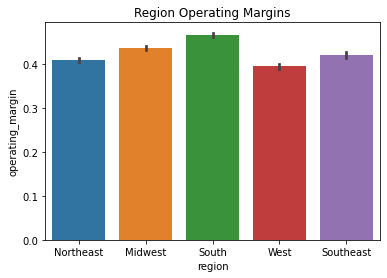

In [42]:
# barplot of region and operating margin 
sns.barplot(data=train, x="region", y="operating_margin").set(title= "Region Operating Margins")


In [67]:
# create dataframes of regions with their operating margin 
n_east = train[train.region == 'Northeast'].operating_margin
midwest = train[train.region == 'Midwest'].operating_margin
south = train[train.region == 'South'].operating_margin
west = train[train.region == 'West'].operating_margin
s_east= train[train.region == 'Southeast'].operating_margin


In [80]:
# find variances of each region 
for df in (n_east,midwest,south,west,s_east):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.007178412959294219
0.008362610341547937
0.008031537348525937
0.01162099602313808
0.008713136029953118


In [81]:
# statistical test /#pearsonr test 
results, p = stats.kruskal(n_east,midwest,south,west,s_east)

# print results of statistical test 
print(f'Kruska Result = {results:.4f}')
print(f'p = {p}')

Kruska Result = 309.2166
p = 1.113012461973387e-65


##  Takeaways 

- South region has the highest operating margin 
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- Business takeaway, south region may be best region to continue to expand in

## come backs 
- place values on the bar charts 
- figure out how to better present region names next to variances 

## Is there a relationship between Retailer and operating margin? 


[Text(0.5, 1.0, 'Retailer Operating Margins')]

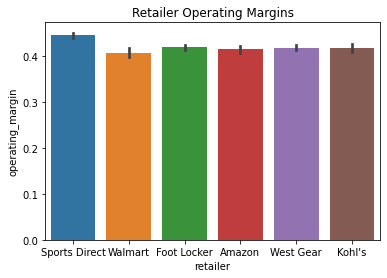

In [82]:
# Bar chart of operating margin for retailers
sns.barplot(data=train, x="retailer", y="operating_margin").set(title= "Retailer Operating Margins")


In [105]:
# create dataframes of retailers with their operating margin 
sports_direct = train[train.retailer == 'Sports Direct'].operating_margin
walmart = train[train.retailer == 'Walmart'].operating_margin
foot_locker = train[train.retailer == 'Foot Locker'].operating_margin
amazon = train[train.retailer == 'Amazon'].operating_margin
west_gear= train[train.retailer == 'West Gear'].operating_margin
kohls= train[train['retailer'] == "Kohl's"].operating_margin

In [106]:
# find variances of each region 
for df in (sports_direct,walmart,foot_locker,amazon,west_gear,kohls):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.011077350410776501
0.00890312197817378
0.007938101668489381
0.00723961479431575
0.010254278301748836
0.00985620178760795


In [107]:
# statistical test /#pearsonr test 
results, p = stats.kruskal(sports_direct,walmart,foot_locker,amazon,west_gear,kohls)

# print results of statistical test 
print(f'Kruska Result = {results:.4f}')
print(f'p = {p}')

Kruska Result = 48.8301
p = 2.403965243243204e-09


## Takeaways 
- The retailer with the highest operating margin is sports_direct
- The remaining retailers have a similar operating margin 
- Walmart appears to be underperforming relative to its peers 
- retailer is a feature that should be considered for modeling 

## Is there a relationship between sales method and operating margin? 


<AxesSubplot:xlabel='sales_method', ylabel='operating_margin'>

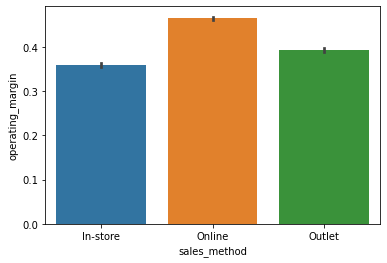

In [122]:
# Bar chart of operating margin for retailers
sns.barplot(data=train,
    x="sales_method", y="operating_margin")

In [114]:
# create dataframes of sales-method with their operating margin 
in_store = train[train.sales_method == 'In-store'].operating_margin
online = train[train.sales_method == 'Online'].operating_margin
outlet = train[train.sales_method == 'Outlet'].operating_margin


In [123]:
# find variances of each region 
for df in (in_store,online,outlet):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.00519943845734698
0.00785635451027821
0.008511333987704333


In [124]:
# statistical test /#pearsonr test 
results, p = stats.kruskal(in_store,online,outlet)

# print results of statistical test 
print(f'Kruska Result = {results:.4f}')
print(f'p = {p}')

Kruska Result = 1168.4619
p = 1.8695019652572764e-254


## Takeaways 
- Online Sales appears to have the highest operating margin 
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 

## Is there a correlation between products and operating margin

In [149]:
# categories of products
# create dataframes of products with their operating margin 
men_athletic_footwear = train[train['product'] == "Men's Athletic Footwear"].operating_margin
men_apparel = train[train['product'] == "Men's Apparel"].operating_margin
women_street_footwear = train[train['product'] == "Women's Street Footwear"].operating_margin
women_athletic_footwear = train[train['product'] == "Women's Athletic Footwear"].operating_margin
men_street_footwear= train[train['product'] == "Men's Street Footwear"].operating_margin
women_apparel= train[train['product'] == "Women's Apparel"].operating_margin

<AxesSubplot:xlabel='operating_margin', ylabel='product'>

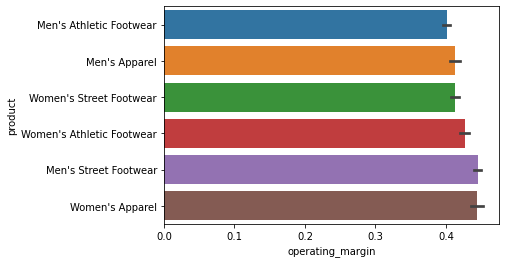

In [150]:
sns.barplot(data=train,
    x="operating_margin", y="product")

In [151]:
# find variances of each region 
for df in (men_athletic_footwear,men_apparel,women_street_footwear,women_athletic_footwear,men_street_footwear,women_apparel):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.006873635895635922
0.010847679758434843
0.006440051395693449
0.007837634332371796
0.006645535681142026
0.016536256603682378


In [152]:
# statistical test /#pearsonr test 
results, p = stats.kruskal(men_athletic_footwear,men_apparel,women_street_footwear,women_athletic_footwear,men_street_footwear,women_apparel)

# print results of statistical test 
print(f'Kruska Result = {results:.4f}')
print(f'p = {p}')

Kruska Result = 167.5372
p = 2.4462474817537047e-34


## Takeaways 
- there is a relationship between apparel and operating margin 
- Apparel will be considered for modeling 
- Women's apparel and men's street footwear appear to have the highest profit margins